# Open, clean light curves

First, open the raw FITS files from MAST, load them into `LightCurve` objects for both long and short cadence data. save to `raw_long` and `raw_short` directories.

In [86]:
#%load_ext autoreload
#%autoreload 2

import os
from glob import glob
import datacleaner
reload(datacleaner)
from datacleaner import LightCurve
import numpy as np

path_to_fits_files = '/local/tmp/hat11/010748390/'

# Retrieve long and short cadence data
long_cadence_paths = glob(os.path.join(path_to_fits_files, '*llc.fits'))
short_cadence_paths = glob(os.path.join(path_to_fits_files, '*slc.fits'))

long_lc = LightCurve.from_raw_fits(long_cadence_paths, name='raw_long')
short_lc = LightCurve.from_raw_fits(short_cadence_paths, name='raw_short')

data_path = '/astro/users/bmmorris/git/hat-11/data'
long_lc.save_to(data_path)
short_lc.save_to(data_path)

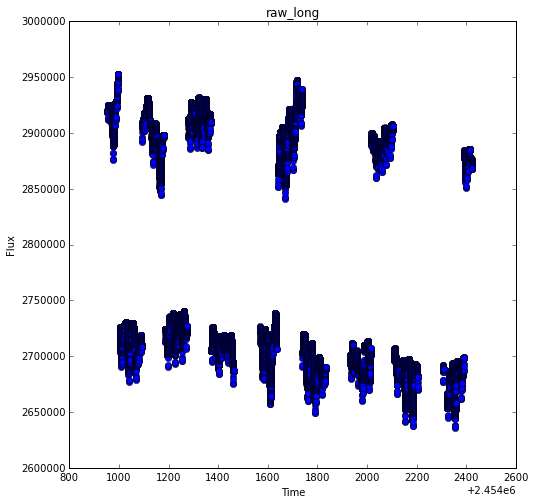

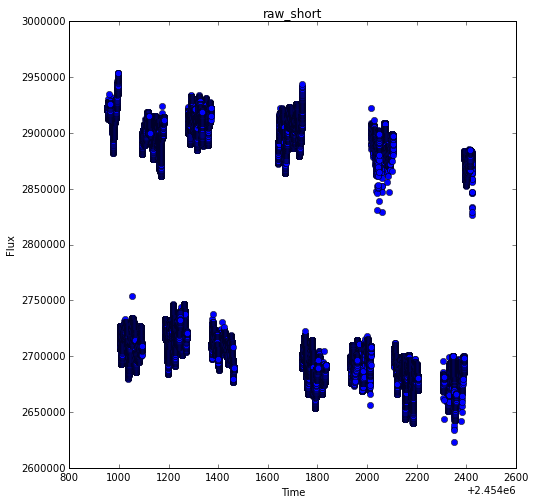

In [87]:
%matplotlib inline
long_lc.plot()
short_lc.plot()

/astro/apps6/anaconda2.0/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/astro/apps6/anaconda2.0/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/astro/apps6/anaconda2.0/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/astro/apps6/anaconda2.0/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/astro/apps6/anaconda2.0/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/astro/apps6/anaconda2.0/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/astro/apps6/anaconda2

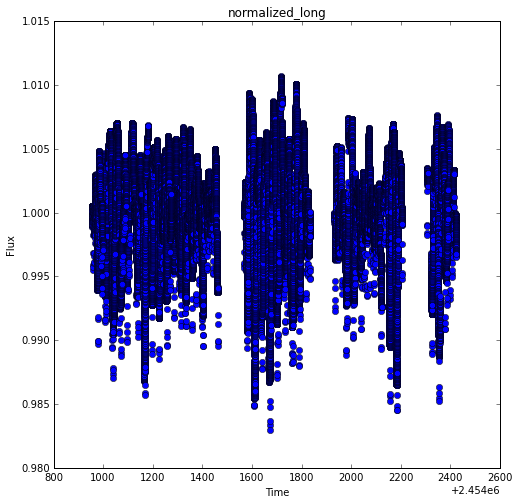

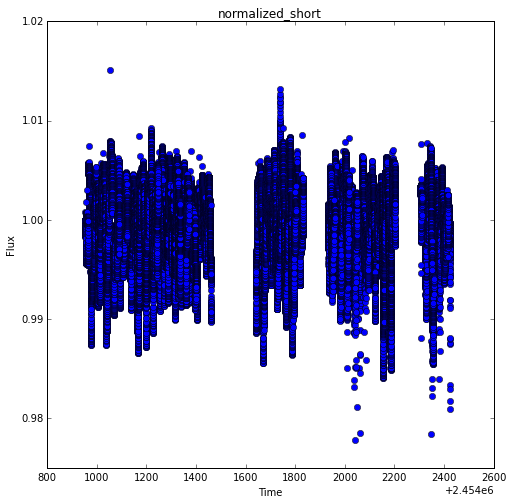

In [88]:
# Fit 2nd order polynomial to each quarter, divide to normalize
long_lc.normalize_each_quarter(rename='normalized_long')
short_lc.normalize_each_quarter(rename='normalized_short')

# Plot results, save
long_lc.plot()
short_lc.plot()

long_lc.save_to(data_path)
short_lc.save_to(data_path)

In [89]:
#long_transits = LightCurve(name='transits_long', **long_lc.get_only_transits())
reload(datacleaner)
from datacleaner import LightCurve, get_basic_HAT11_params
short_transits = LightCurve(name='transits_short', **short_lc.mask_out_of_transit())
transits = short_transits.get_transit_light_curves()
for transit in transits:
    transit.remove_linear_baseline()

In [90]:
# Plot, save all transits after normalization
# [transit.plot(show=False, save_path='tmp/{}.png'.format(transit.name)) for transit in transits]

In [91]:
# Warning: this step fits each transit in the short cadence data and is slow (~2 min)

import os
chi2_file_path = 'chi2.npy'
if not os.path.exists(chi2_file_path):
    chi2 = np.array([transit.fiducial_transit_fit() for transit in transits])
    np.save(chi2_file_path, chi2)
else:
    chi2 = np.load(chi2_file_path)

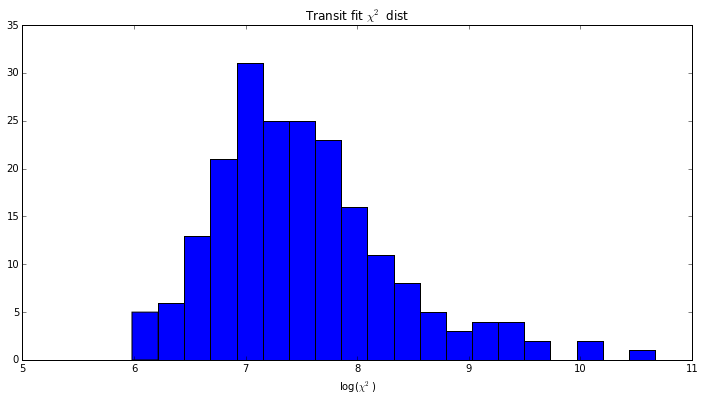

In [92]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(np.log(chi2), 20)
ax.set(xlabel=r'log($\chi^2$)', title=r'Transit fit $\chi^2$ dist')
plt.show()

[ 2454962.61440265  2454962.61508378  2454962.615765   ...,
  2456160.29739533  2456160.29807643  2456160.29875754]


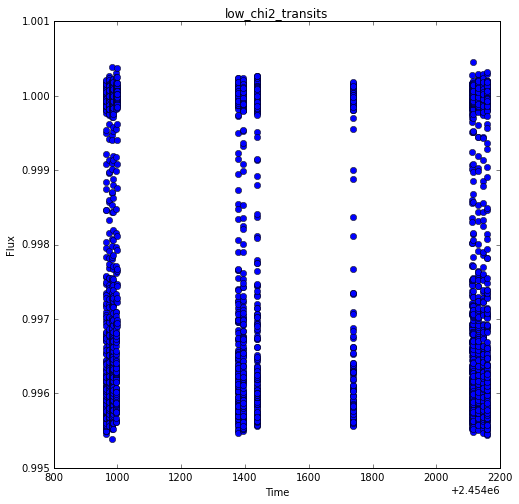

In [100]:
reload(datacleaner)
from datacleaner import combine_light_curves
low_chi2_transits = combine_light_curves([transit for i, transit in enumerate(transits) 
                                          if np.log(chi2[i]) < 6.5], name='low_chi2_transits')
low_chi2_transits.save_to(data_path, overwrite=True)
low_chi2_transits.plot()

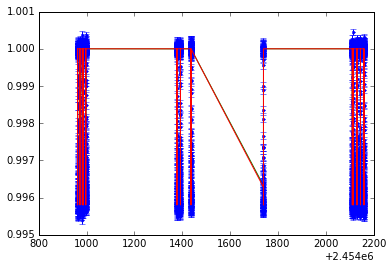

19874.894744036093

In [101]:
low_chi2_transits.fiducial_transit_fit(plots=True)

In [99]:
low_chi2_transits.times

<Time object: scale='utc' format='jd' value=[ 2454962.61440265  2454962.61508378  2454962.615765   ...,
  2456160.29739533  2456160.29807643  2456160.29875754]>